<a href="https://colab.research.google.com/github/sheladiya2010-afk/TASK-6-Sales-Trend-Analysis-Using-Aggregations/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Basic Sales Summary:
    product  total_qty   revenue
0  Keyboard         20   25200.0
1    Laptop          8  443000.0
2   Monitor          4   60000.0
3     Mouse         35   16500.0


<Figure size 600x400 with 0 Axes>

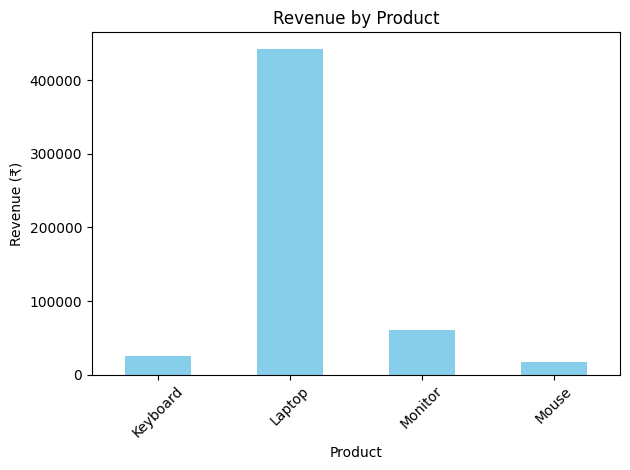

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------
# 1. Create sample SQLite database and table (only if not already created)
# -----------------------
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data (you can skip if already inserted)
sample_data = [
    ("Laptop", 5, 55000),
    ("Laptop", 3, 56000),
    ("Mouse", 15, 500),
    ("Mouse", 20, 450),
    ("Keyboard", 8, 1200),
    ("Keyboard", 12, 1300),
    ("Monitor", 4, 15000)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()

# -----------------------
# 2. Run SQL Query
# -----------------------
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

# -----------------------
# 3. Display Results
# -----------------------
print("📊 Basic Sales Summary:")
print(df)

# -----------------------
# 4. Plot Simple Bar Chart
# -----------------------
plt.figure(figsize=(6, 4))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Close connection
conn.close()


📊 Basic Sales Summary:
    product  total_qty   revenue
0    Laptop          8  443000.0
1   Monitor          4   60000.0
2  Keyboard         20   25200.0
3     Mouse         35   16500.0


<Figure size 600x400 with 0 Axes>

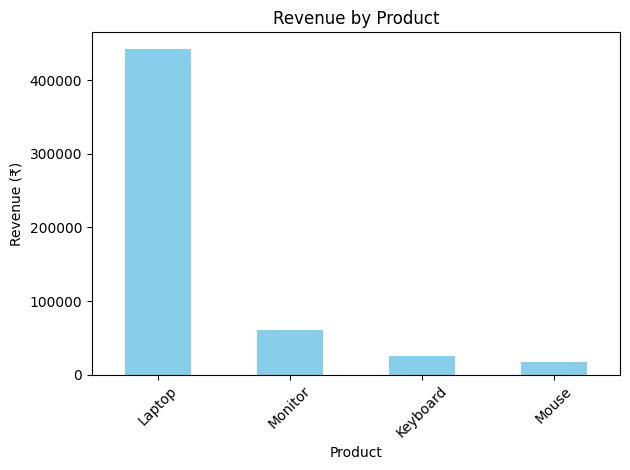

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to your existing database file
db_path = "sales_data.db"  # Change to full path if not in same folder


# 1️⃣ Connect to your existing database
conn = sqlite3.connect(db_path)

# 2️⃣ Write your SQL query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""

# 3️⃣ Load query results into pandas DataFrame
df = pd.read_sql_query(query, conn)

# 4️⃣ Display the results in console
print("📊 Basic Sales Summary:")
print(df)

# 5️⃣ Plot a simple bar chart of revenue
plt.figure(figsize=(6, 4))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# 6️⃣ Close the database connection
conn.close()
